 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_df_path = Path("C:/Users/PC2/Downloads/challange_4/Starter_Code/Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\PC2\AppData\Local\Temp\ipykernel_5996\2561478578.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_df_path = Path("C:/Users/PC2/Downloads/challange_4/Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\PC2\AppData\Local\Temp\ipykernel_5996\2836982322.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_df_path = Path("C:/Users/PC2/Downloads/challange_4/Starter_Code/Resources/sp_tsx_history.csv")
sp_df = pd.read_csv(sp_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\PC2\AppData\Local\Temp\ipykernel_5996\2883664442.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp_df = pd.read_csv(sp_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [10]:
# Check Data Types
sp_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp_df['Close'] = sp_df['Close'].str.replace('$', '')
sp_df['Close'] = sp_df['Close'].str.replace(',', '')
sp_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [12]:
# Calculate Daily Returns
sp_df["Close"] = sp_df["Close"].astype(float)
sp_df

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
sp_returns_df = sp_df.pct_change()
sp_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns_df = sp_returns_df.rename(columns={'Close': 'S&P'})

In [15]:
# Drop nulls
sp_returns_df = sp_returns_df.dropna()
sp_returns_df

,S&P
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_df, algo_df, sp_returns_df], axis="columns", join="inner")
combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [17]:
combined_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
Algo 1                         0
Algo 2                         0
S&P                            0
dtype: int64

In [18]:
combined_returns_df = combined_returns_df.dropna()
combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

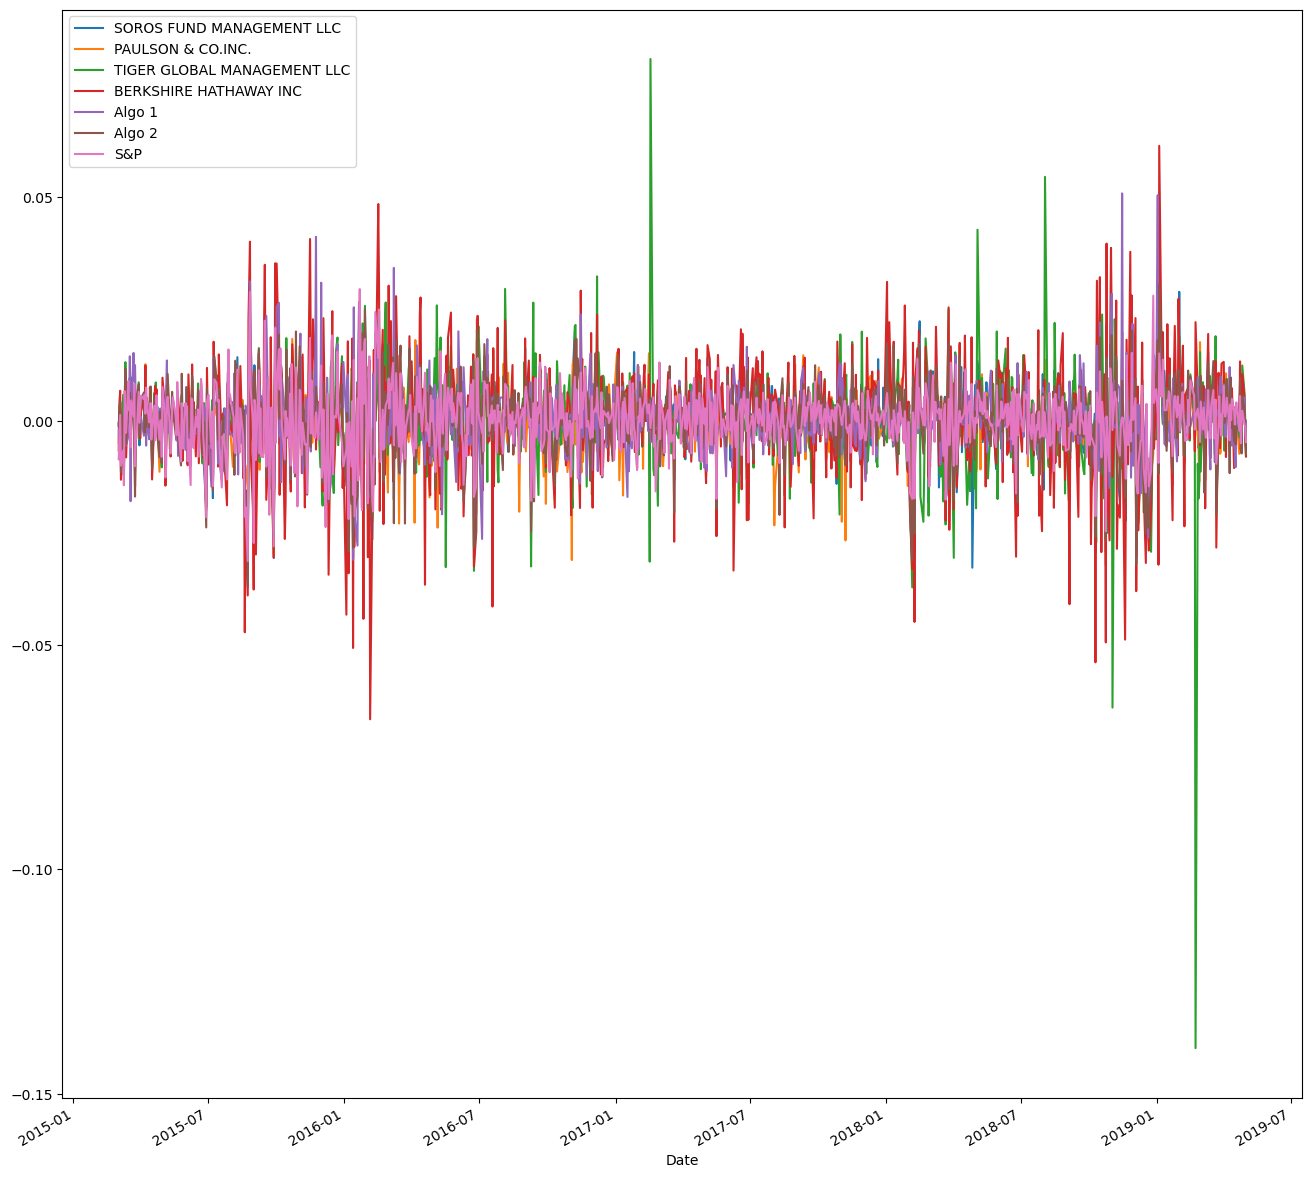

In [19]:
# Plot daily returns of all portfolios
combined_returns_df.plot(figsize = (16,16))

#### Calculate and Plot cumulative returns.

In [20]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + combined_returns_df).cumprod()
cumulative_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


<Axes: xlabel='Date'>

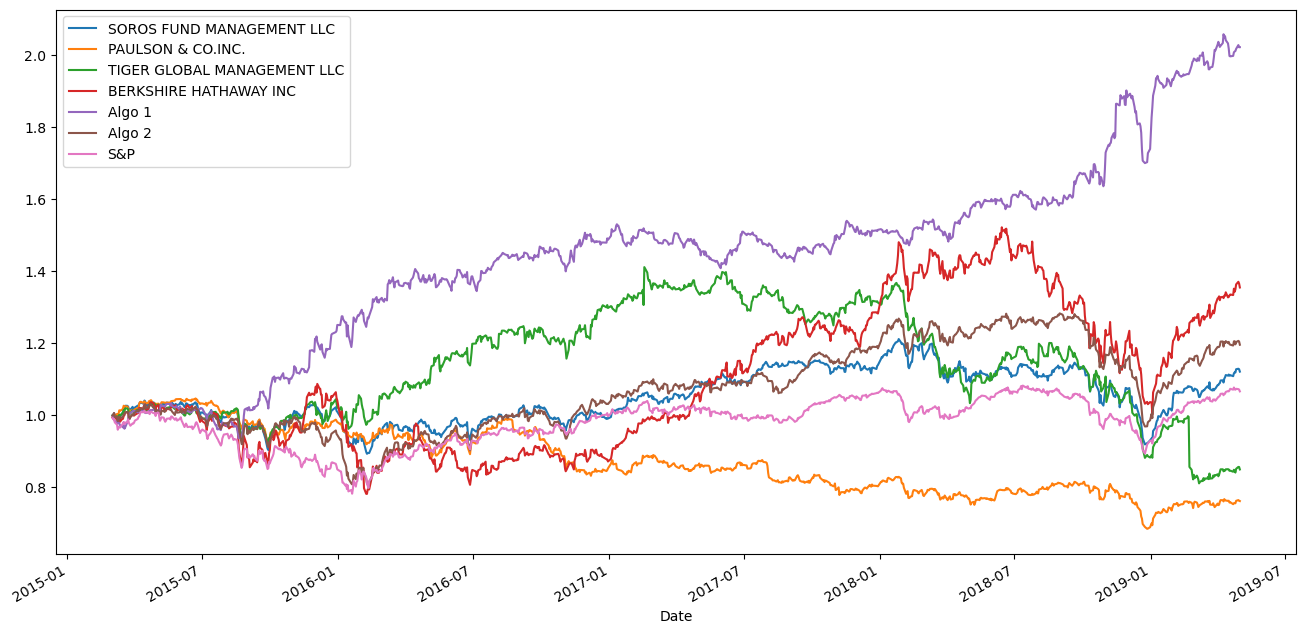

In [21]:
# Plot cumulative returns
cumulative_returns_df.plot(figsize = (16,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: title={'center': 'Risk'}>

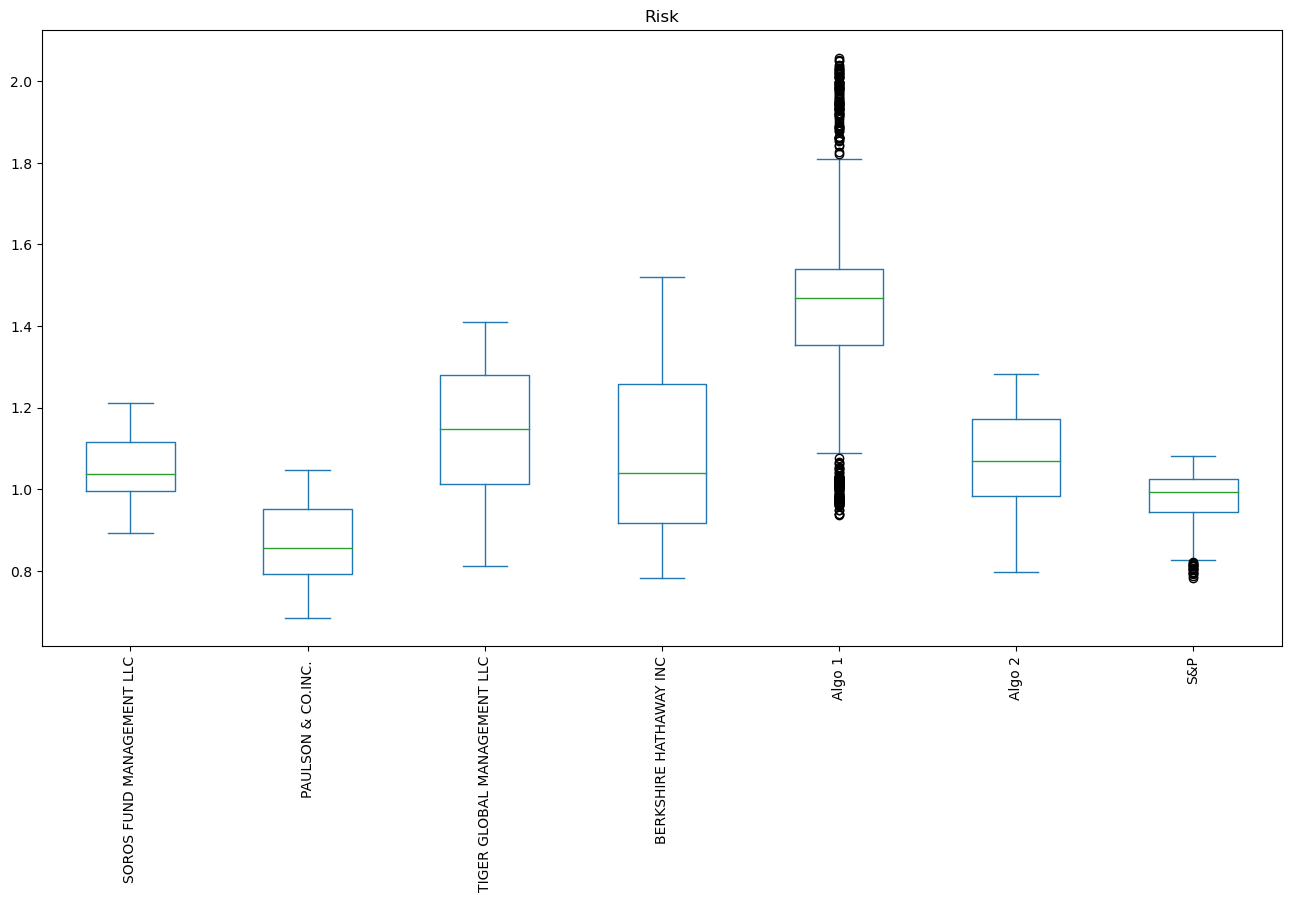

In [22]:
# Box plot to visually show risk
cumulative_returns_df.plot.box(figsize=(16, 8), title="Risk", rot = 90)

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
std_dev_df = combined_returns_df.std()
std_dev_df

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P                            0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
# S&P                            0.007034
# Determine which portfolios are riskier than the S&P TSX 60
# All the portfolios are riskier besides PAULSON & CO.INC.


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation(252 trading days)
annualized_std_df = std_dev_df * np.sqrt(252)
annualized_std_df

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P                            0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_window = 21
rolling_std_df = combined_returns_df.rolling(window=rolling_window).std()
rolling_std_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


In [27]:
rolling_std_clean_df = rolling_std_df.dropna()
rolling_std_clean_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<Axes: xlabel='Date'>

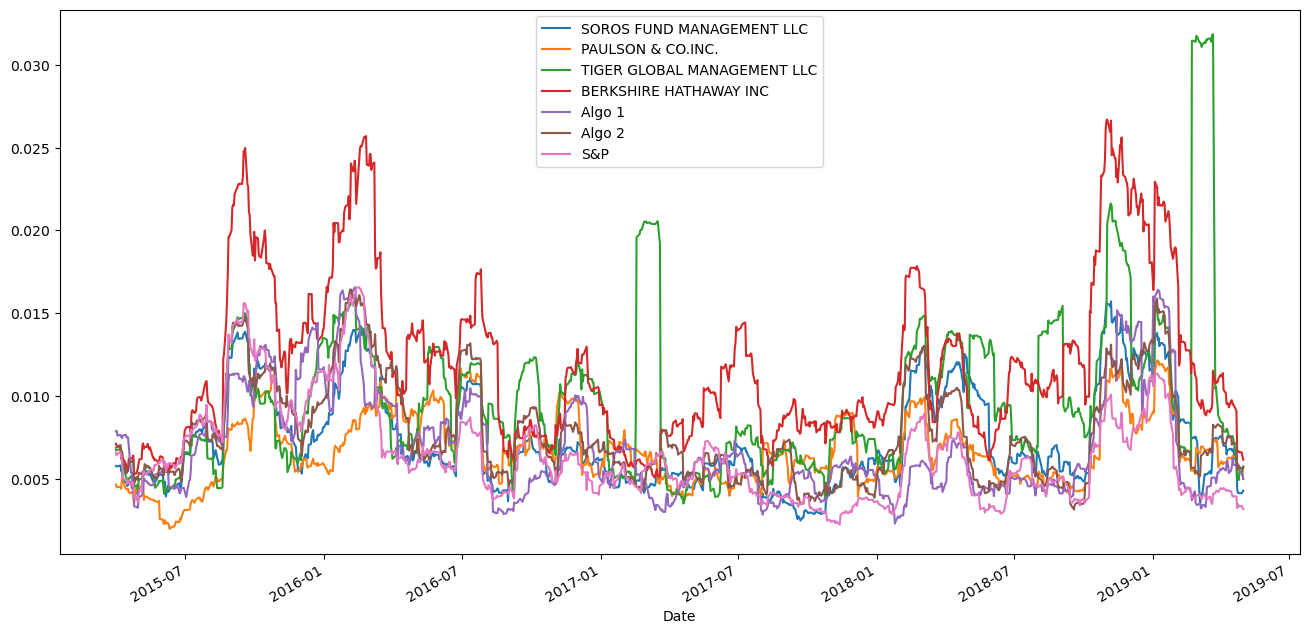

In [28]:
# Plot the rolling standard deviation
rolling_std_clean_df.plot(figsize = (16,8))

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
correlation_df = combined_returns_df.corr()

# Display de correlation matrix
correlation_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [30]:
# Calculate covariance of a single portfolio
soros_covariance =  combined_returns_df["SOROS FUND MANAGEMENT LLC"].cov(combined_returns_df["S&P"])
soros_covariance

3.710689907855223e-05

In [31]:
# Calculate variance of S&P TSX
sp_variance =  combined_returns_df["S&P"].var()
sp_variance

4.9479515915131015e-05

In [32]:
# Computing beta
soros_beta = soros_covariance / sp_variance
soros_beta

0.7499446668435332

<Axes: title={'center': 'Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

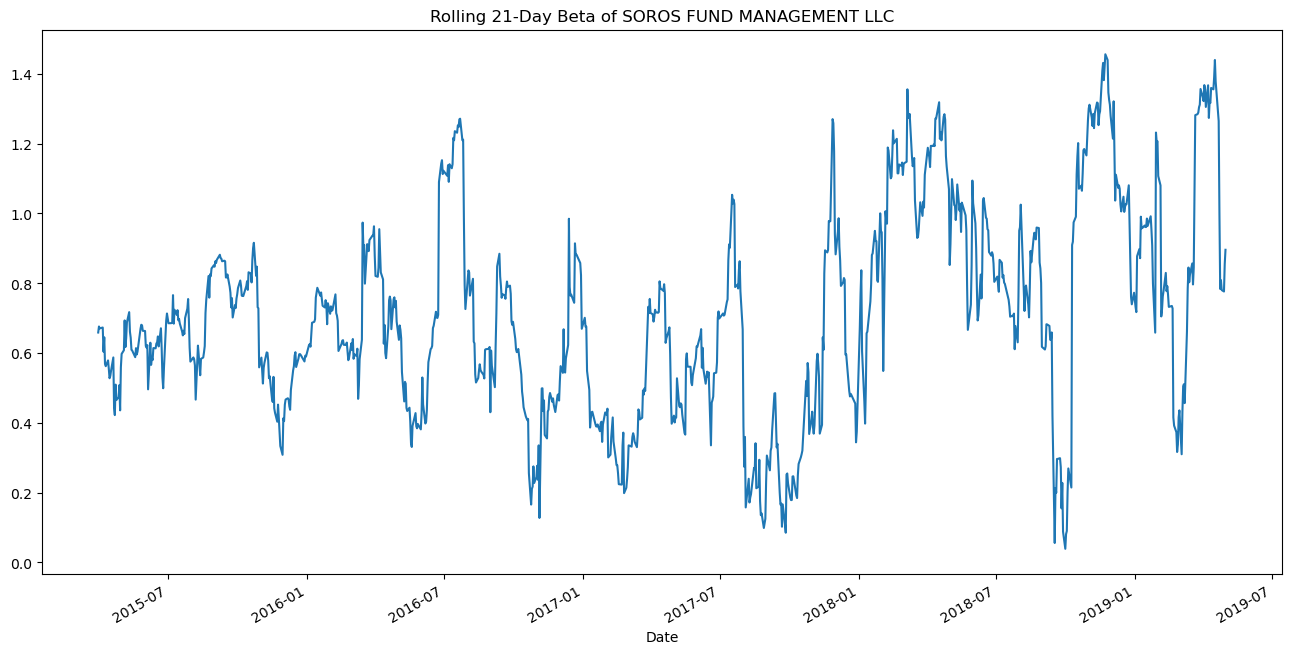

In [33]:
# Plot beta trend
rolling_covariance = combined_returns_df["SOROS FUND MANAGEMENT LLC"].rolling(window=21).cov(combined_returns_df['S&P'])
rolling_variance = combined_returns_df['S&P'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(16, 8), title='Rolling 21-Day Beta of SOROS FUND MANAGEMENT LLC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [34]:
# Use `ewm` to calculate the rolling window
half_life = 21
ema_std_combined_df = combined_returns_df.ewm(halflife=half_life).std()
ema_std_combined_df = ema_std_combined_df.dropna()
ema_std_combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.005485
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
average_annual_return = combined_returns_df.mean() * 252
average_annual_return

# Calculate the annualized Sharpe Ratio
sharpe_ratios = average_annual_return / annualized_std_df

# Print or use the resulting Series
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P                            0.195550
dtype: float64

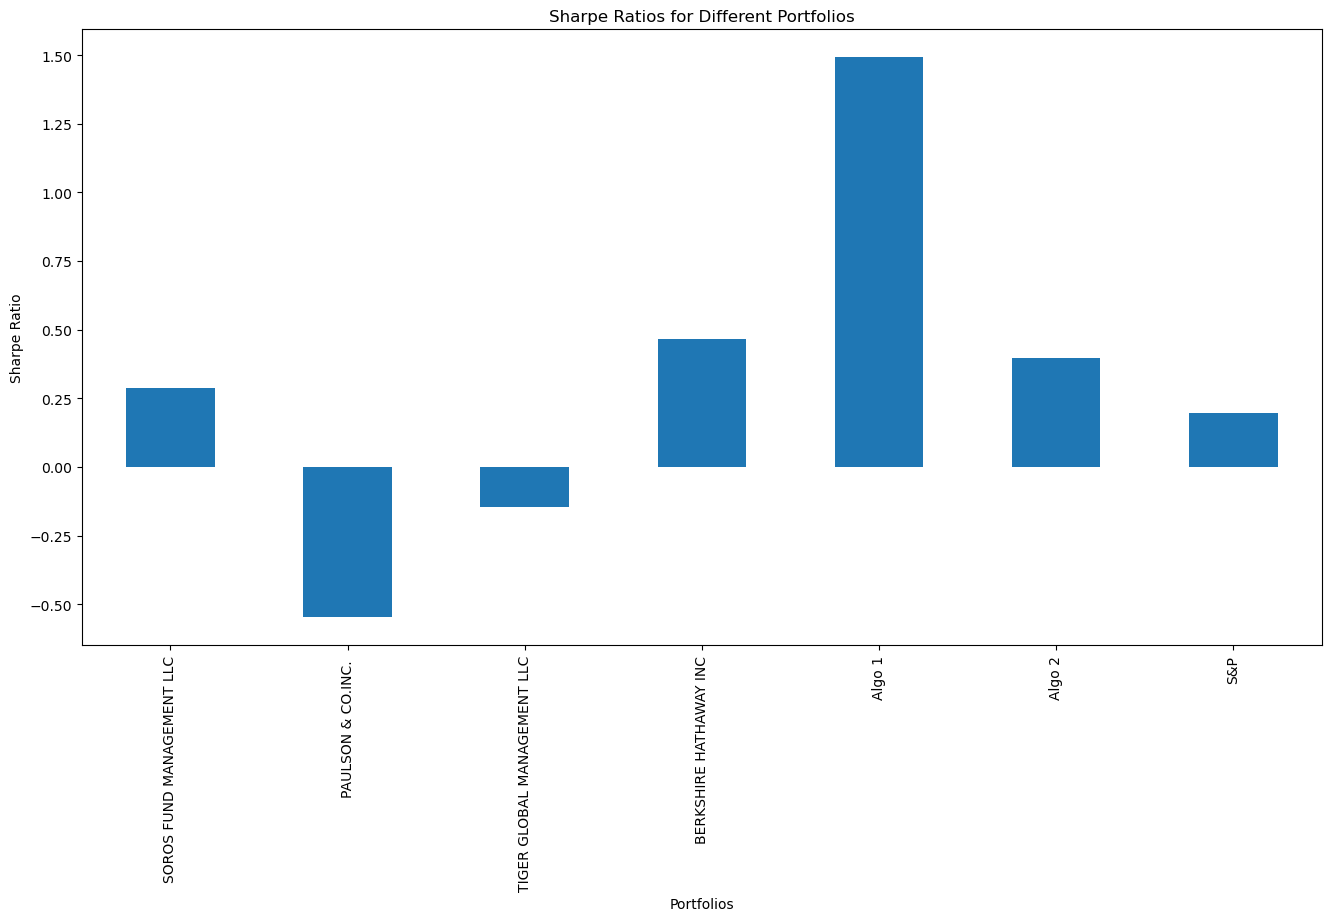

In [36]:
# Visualize the sharpe ratios as a bar plot
import matplotlib.pyplot as plt

sharpe_ratios.plot(kind='bar', figsize=(16, 8))

plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios for Different Portfolios')

plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

algo 1 outperforms all the portfolios, algo 2 stands 3rd.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock
l_df_path = Path("C:/Users/PC2/Downloads/challange_4/Starter_Code/Resources/l_historical.csv")
l_df = pd.read_csv(l_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\PC2\AppData\Local\Temp\ipykernel_5996\3099179214.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  l_df = pd.read_csv(l_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [38]:
l_df = l_df.drop(columns="Symbol")
l_df.rename(columns={'Close': 'l'}, inplace=True)
l_df

,l
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [39]:
# Reading data from 2nd stock
otex_df_path = Path("C:/Users/PC2/Downloads/challange_4/Starter_Code/Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\PC2\AppData\Local\Temp\ipykernel_5996\268512233.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  otex_df = pd.read_csv(otex_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [40]:
otex_df = otex_df.drop(columns="Symbol")
otex_df.rename(columns={'Close': 'otex'}, inplace=True)
otex_df

,otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [41]:
# Reading data from 3rd stock
shop_df_path = Path("C:/Users/PC2/Downloads/challange_4/Starter_Code/Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

C:\Users\PC2\AppData\Local\Temp\ipykernel_5996\2182190671.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  shop_df = pd.read_csv(shop_df_path, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [42]:
shop_df = shop_df.drop(columns="Symbol")
shop_df.rename(columns={'Close': 'shop'}, inplace=True)
shop_df

,shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [43]:
# Combine all stocks in a single DataFrame
combined_returns_custom_df = pd.concat([l_df, otex_df, shop_df], axis="columns", join = "inner")
combined_returns_custom_df

,l,otex,shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [44]:
# Reset Date index
combined_returns_custom_df.reset_index
combined_returns_custom_df

,l,otex,shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [45]:
# Reorganize portfolio data by having a column per symbol
combined_returns_custom_df

,l,otex,shop
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [46]:
# Calculate daily returns
combined_returns_custom_daily_df = combined_returns_custom_df.pct_change()
combined_returns_custom_daily_df

,l,otex,shop
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


In [47]:
# Drop NAs
combined_returns_custom_daily_df = combined_returns_custom_daily_df.dropna()

In [48]:
# Display sample data
combined_returns_custom_daily_df

,l,otex,shop
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_returns_custom_daily_df.dot(weights)
portfolio_returns

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

In [50]:
portfolio_returns_df = pd.DataFrame(portfolio_returns)
portfolio_returns_df

,0
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999
...,...
2019-12-20,0.007495
2019-12-23,-0.006607
2019-12-24,0.006331


In [51]:
# Display sample data
portfolio_returns_df.rename(columns={0: 'custom'}, inplace=True)
portfolio_returns_df

,custom
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999
...,...
2019-12-20,0.007495
2019-12-23,-0.006607
2019-12-24,0.006331


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [52]:
# Join your returns DataFrame to the original returns DataFrame
all_combined_returns_df = pd.concat([combined_returns_df, portfolio_returns_df], axis="columns", join="inner")
all_combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


In [53]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
cleaned_combined_returns_df = all_combined_returns_df.dropna()
cleaned_combined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000565
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004517
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003126
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000997
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000999
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.003461
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.003243
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.003303


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized `std`
std_dev_all_df = cleaned_combined_returns_df.std()
std_dev_all_df

SOROS FUND MANAGEMENT LLC      0.009177
PAULSON & CO.INC.              0.007203
TIGER GLOBAL MANAGEMENT LLC    0.013848
BERKSHIRE HATHAWAY INC         0.014328
Algo 1                         0.007561
Algo 2                         0.008672
S&P                            0.006244
custom                         0.014132
dtype: float64

In [55]:
annualized_std_all_df = std_dev_all_df * np.sqrt(252)
annualized_std_all_df

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P                            0.099121
custom                         0.224346
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [56]:
# Calculate rolling standard deviation
rolling_window = 21
rolling_std_all_df = cleaned_combined_returns_df.rolling(window=rolling_window).std()
rolling_std_all_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,custom
Date,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.008253
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.008231
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.007718


In [57]:
rolling_std_clean_all_df = rolling_std_all_df.dropna()
rolling_std_clean_all_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,custom
Date,,,,,,,,
2018-02-01,0.004560,0.005345,0.005967,0.010665,0.002692,0.006565,0.003883,0.010268
2018-02-02,0.004531,0.006139,0.007282,0.011940,0.002780,0.007989,0.004833,0.011109
2018-02-05,0.007471,0.007455,0.010635,0.014262,0.002782,0.010470,0.005684,0.011856
2018-02-06,0.007425,0.007727,0.010819,0.013957,0.003317,0.010626,0.005799,0.011819
2018-02-07,0.007366,0.007759,0.010781,0.014010,0.003278,0.010636,0.005797,0.011805
...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.008253
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.008231
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.007718


<Axes: xlabel='Date'>

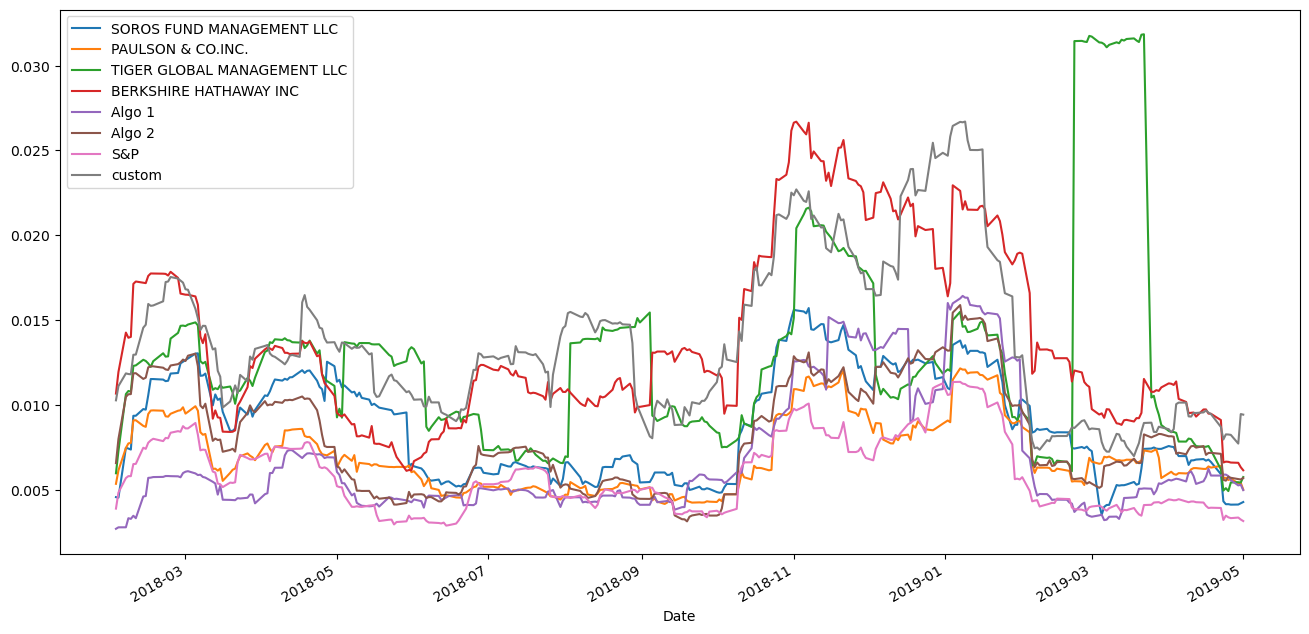

In [58]:
# Plot rolling standard deviation
rolling_std_clean_all_df.plot(figsize = (16,8))

### Calculate and plot the correlation

In [59]:
# Calculate and plot the correlation
correlation_all_df = cleaned_combined_returns_df.corr()
correlation_all_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,custom
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
custom,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


<Axes: >

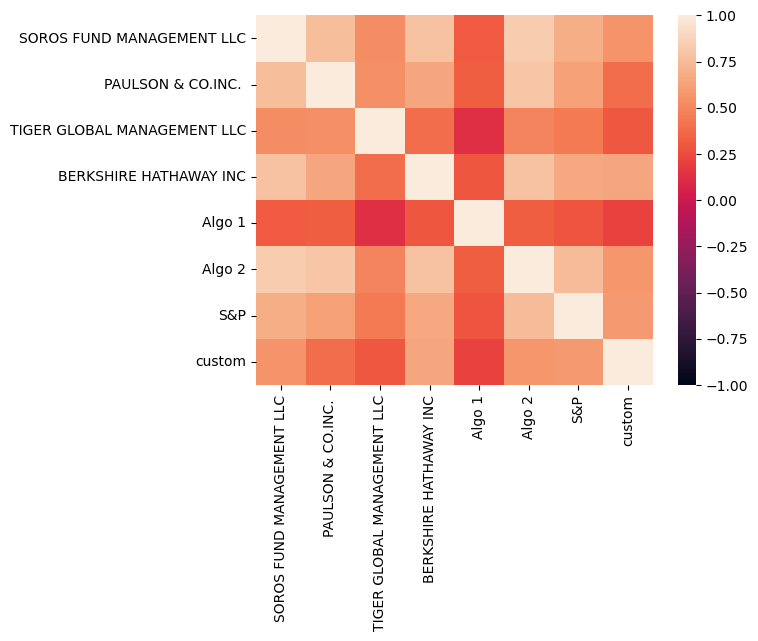

In [60]:
import seaborn as sns
sns.heatmap(correlation_all_df, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'Rolling 60-Day Beta of custom portfolio'}, xlabel='Date'>

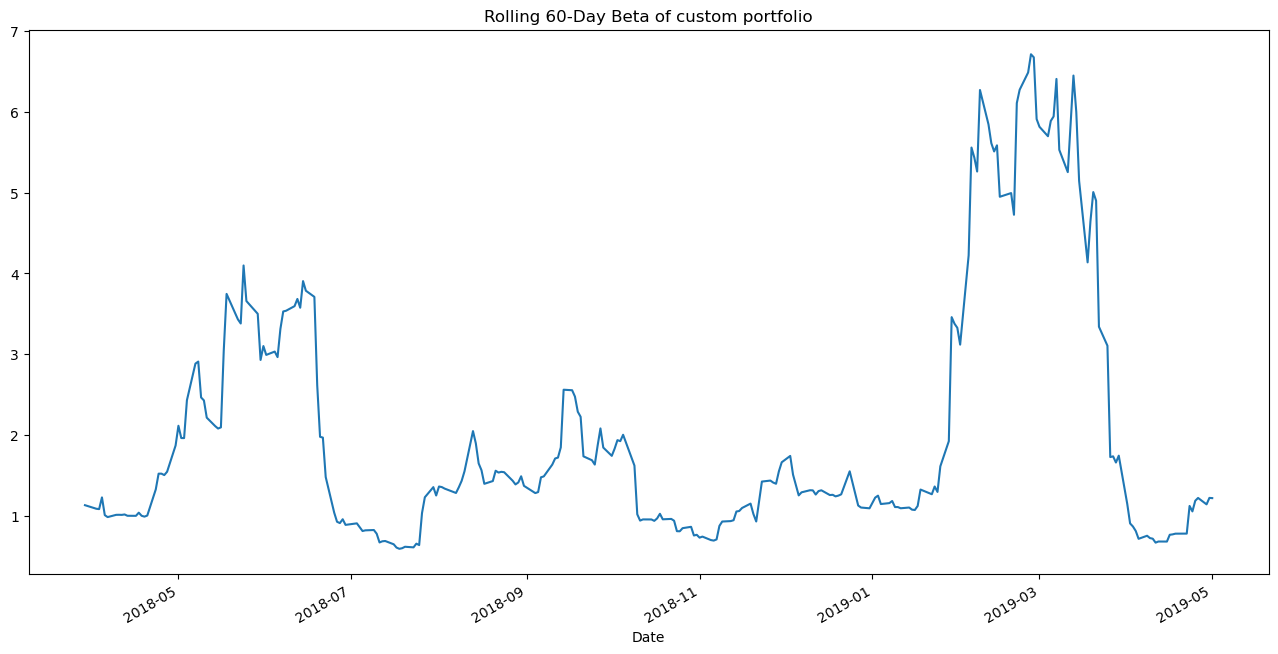

In [61]:
# Calculate and plot Beta
rolling_custom_covariance = cleaned_combined_returns_df["custom"].rolling(window=60).cov(cleaned_combined_returns_df['S&P'])
rolling_custom_variance = cleaned_combined_returns_df['S&P'].rolling(window=21).var()
rolling_custom_beta = rolling_custom_covariance / rolling_custom_variance
rolling_custom_beta.plot(figsize=( 16, 8), title='Rolling 60-Day Beta of custom portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [62]:
# Calculate Annualized Sharpe Ratios
average_annual_all_port_return = cleaned_combined_returns_df.mean() * 252
average_annual_all_port_return

SOROS FUND MANAGEMENT LLC     -0.012848
PAULSON & CO.INC.             -0.045312
TIGER GLOBAL MANAGEMENT LLC   -0.305922
BERKSHIRE HATHAWAY INC         0.044558
Algo 1                         0.228228
Algo 2                         0.002945
S&P                            0.003435
custom                         0.350999
dtype: float64

In [63]:
# Calculate the annualized Sharpe Ratio
all_sharpe_ratios = average_annual_all_port_return / annualized_std_all_df

# Print or use the resulting Series
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P                            0.034651
custom                         1.564547
dtype: float64

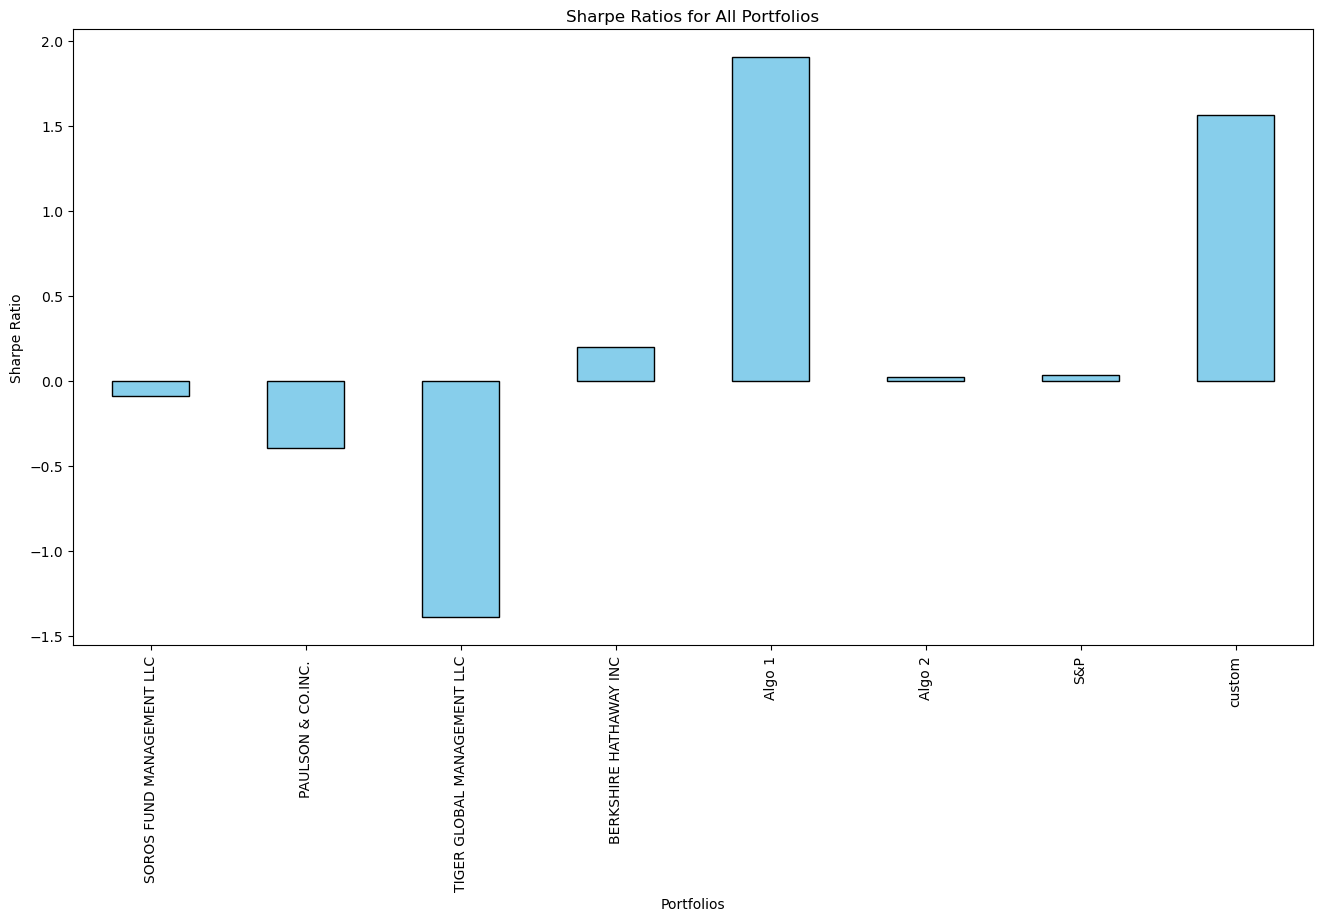

In [64]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind='bar', figsize=(16, 8), color='skyblue', edgecolor='black')

plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios for All Portfolios')

plt.show()

### How does your portfolio do?

Write your answer here!

In [65]:
#Custom portdolio did well. It was 2nd to Algo1.